# AML Analysis

When run in BwB, the notebook will have been preprocessed to show results for the newest dataset. However, if you would like to change or add some of the code, simply select the **Cell** menu above and click on **Run All**. This will re-run all cells, loading all necessary variables and functions into the current workspace. Once the notebook has finished running, you may edit and rerun individual notebook cells as desired.

## Directories and Other Options

This notebook has several options that need to be gathered upon starting up. 

- Directory: The directory with the patients vs drug sensitivity and patients vs variants files.
- Alpha: The alpha value to use for p-value significance.

In [2]:
config <- read.csv("/AML/config.csv", stringsAsFactors = FALSE)

Warning message in file(file, "rt"):
"cannot open file '/AML/config.csv': No such file or directory"


ERROR: Error in file(file, "rt"): cannot open the connection


## Packages

There are packages required to run this notebook. Since this notebook is expected to be run in the Docker container created for it, these packages should already be installed. The packages needed are:
- RColorBrewer
- ComplexHeatmap
- Stringr

Of the needed packages, the only one that will be fully imported is ComplexHeatmap. All other functions in needed packages will be called by `package_name::function_name`.

In [5]:
# Library for heatmaps
library(ComplexHeatmap, quietly=TRUE)

ComplexHeatmap version 2.0.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.




## Data Import

In [6]:
# Read in data tables
data.var <- read.csv(paste0(config$output.dir, "PatientsVsVariants.csv"), row.names=1, check.names=FALSE, stringsAsFactors=FALSE)
data.drug <- read.csv(paste0(config$output.dir, "PatientsVsDrugs.csv"), row.names=1, check.names=FALSE, stringsAsFactors=FALSE)

In [7]:
# Check that the patients in both datasets match
if(all(rownames(data.var) == rownames(data.drug))) {
    print("Both sets of patients match.")
} else {
    print("The patient sets do not match and the following analysis will not function correctly.")
}
# See snippets of data to make sure they read in correctly
data.var[1:5, 1:10]
data.drug[1:5,1:10]

[1] "Both sets of patients match."


,42983,AATK,ABCC1,ABHD15,ABL1,ACER1,ACVR2B,ADRBK1,AFF1,AFF4
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
30,0,0,0,0,0,0,0,0,0,0
39,0,0,0,0,1,0,0,0,0,0
51,0,0,0,0,0,0,0,0,0,0
55,0,0,0,0,1,0,0,0,0,0
59,0,0,0,0,2,0,0,0,0,0


,5-Iodotubercidin,ABT-263,ABT-737,ABT-888,AC-220,Acrichine,Afatinib,AMG232,AMG900,AP24534
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
30,13.53033,12.72024,10.39778,2.302585,2.302585,12.06631,NA,NA,NA,2.302585
39,13.53788,13.47904,13.89564,2.302585,13.729333,12.45710,NA,NA,NA,14.873941
51,13.39024,15.25100,18.54172,11.281814,13.471921,12.79306,NA,NA,NA,14.210036
55,13.40340,15.91924,21.03661,11.435964,12.105323,12.68734,NA,NA,NA,15.049943
59,18.57034,18.48896,19.98133,15.781623,22.332704,12.95262,NA,NA,NA,20.838677


## Summary Statistics

In [8]:
# Drug sensitivity overall
summary(unlist(data.drug), na.omit=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  2.303  10.031  12.237  11.312  14.735  27.631    4181 

In [9]:
# Individual drugs
summary(data.drug, na.omit=TRUE)

 5-Iodotubercidin    ABT-263          ABT-737         ABT-888      
 Min.   :12.78    Min.   : 2.303   Min.   :10.40   Min.   : 2.303  
 1st Qu.:13.43    1st Qu.:13.850   1st Qu.:14.70   1st Qu.: 2.303  
 Median :13.70    Median :16.342   Median :16.73   Median : 9.650  
 Mean   :14.42    Mean   :15.599   Mean   :16.42   Mean   : 7.085  
 3rd Qu.:14.20    3rd Qu.:17.893   3rd Qu.:18.53   3rd Qu.:10.955  
 Max.   :19.50    Max.   :20.687   Max.   :21.04   Max.   :15.970  
 NA's   :43       NA's   :43       NA's   :43                      
     AC-220         Acrichine        Afatinib          AMG232      
 Min.   : 2.303   Min.   :11.07   Min.   : 2.303   Min.   : 2.303  
 1st Qu.:12.743   1st Qu.:12.49   1st Qu.:13.820   1st Qu.:13.687  
 Median :13.774   Median :12.75   Median :14.187   Median :14.557  
 Mean   :13.782   Mean   :12.87   Mean   :13.917   Mean   :12.853  
 3rd Qu.:14.877   3rd Qu.:13.20   3rd Qu.:14.860   3rd Qu.:14.885  
 Max.   :22.333   Max.   :14.16   Max.   :21.420

In [10]:
# Variants overall
summary(unlist(data.var))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1908  0.0000 22.0000 

In [11]:
# Individual genes
summary(data.var)

     42983        AATK       ABCC1            ABHD15       ABL1       
 Min.   :0   Min.   :0   Min.   :0.0000   Min.   :0   Min.   :0.0000  
 1st Qu.:0   1st Qu.:0   1st Qu.:0.0000   1st Qu.:0   1st Qu.:0.0000  
 Median :0   Median :0   Median :0.0000   Median :0   Median :0.0000  
 Mean   :0   Mean   :0   Mean   :0.3188   Mean   :0   Mean   :0.5072  
 3rd Qu.:0   3rd Qu.:0   3rd Qu.:0.0000   3rd Qu.:0   3rd Qu.:1.0000  
 Max.   :0   Max.   :0   Max.   :2.0000   Max.   :0   Max.   :4.0000  
     ACER1       ACVR2B            ADRBK1             AFF1              AFF4  
 Min.   :0   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0  
 1st Qu.:0   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0  
 Median :0   Median :0.00000   Median :0.00000   Median :0.00000   Median :0  
 Mean   :0   Mean   :0.01449   Mean   :0.05797   Mean   :0.05797   Mean   :0  
 3rd Qu.:0   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0  
 Max.   :0   Max.   :1.00000 

## Histograms

Initial data exploration histograms for drug sensitivity and variants. This section also allows for histograms of individual drugs or genes.

### Setup

In [12]:
# Variant histogram is thrown off by outliers; make # of variants max at 4
# Get new dataframe for editing
data.var.threshold <- data.var
for (i in 1:nrow(data.var.threshold)) {
    for (j in 1:ncol(data.var.threshold)) {
        if (data.var.threshold[i,j] > 3) {
            data.var.threshold[i,j] <- 4
        }
    }
}

### Visualization

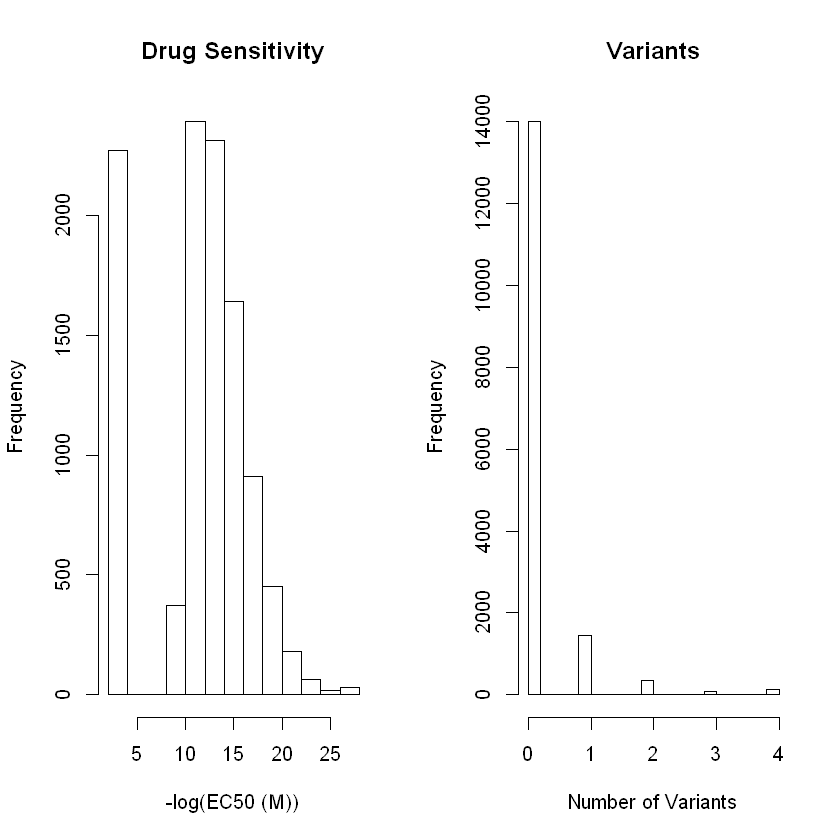

In [13]:
# Show side-by-side
# Set display to 1 row, 2 columns
par(mfrow=c(1,2))
# Drug sensitivity histogram
hist(unlist(data.drug), main="Drug Sensitivity", xlab="-log(EC50 (M))")
# Variants histogram
hist(unlist(data.var.threshold), main="Variants", xlab="Number of Variants")

### Histogram for Specific Drug

A histogram for a specific drug can be created below. Simply replace the name of the drug in the drug.desired variable below and run the cell.

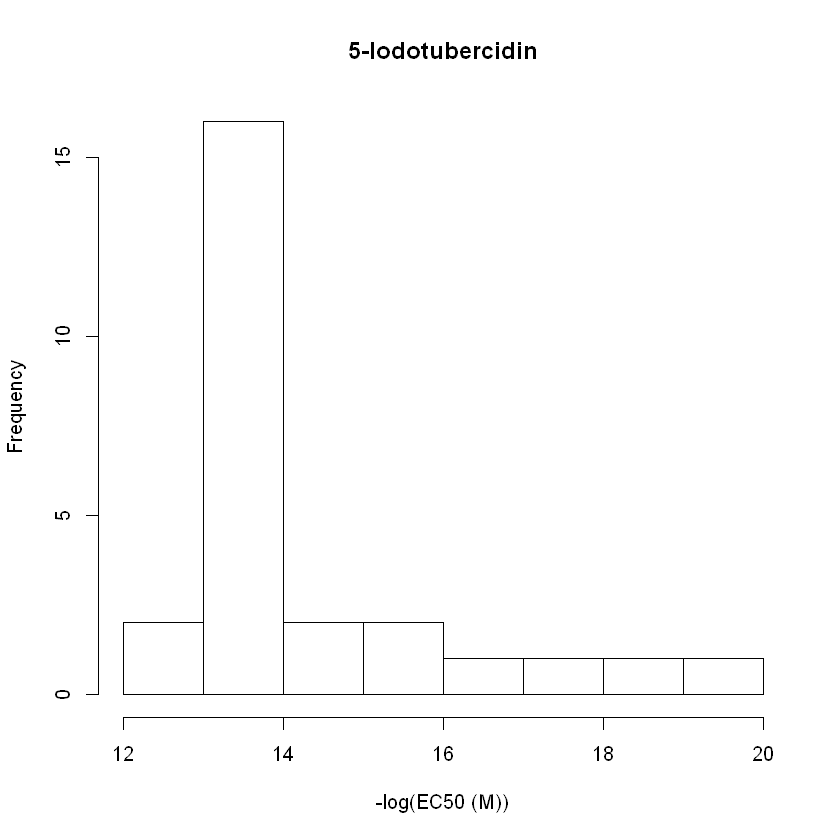

In [14]:
# Replace name of drug in variable below with desired drug
# Note that this code is not case sensitive
drug.desired <- "5-Iodotubercidin"

# Get the index for the drug in the dataset
drug.desired.index <- which(stringr::str_detect(colnames(data.drug), stringr::coll(drug.desired, ignore_case = TRUE)))
# Only output the histogram if the drug exists in the dataset
if (length(drug.desired.index) > 0) {
    hist(data.drug[,drug.desired.index], main=colnames(data.drug)[drug.desired.index], xlab="-log(EC50 (M))")
} else {
    print("The drug was not found in the dataset.")
}

### Histogram for Specific Gene

A histogram for a specific gene can be created below. Simply replace the name of the gene in the gene.desired variable below and run the cell.

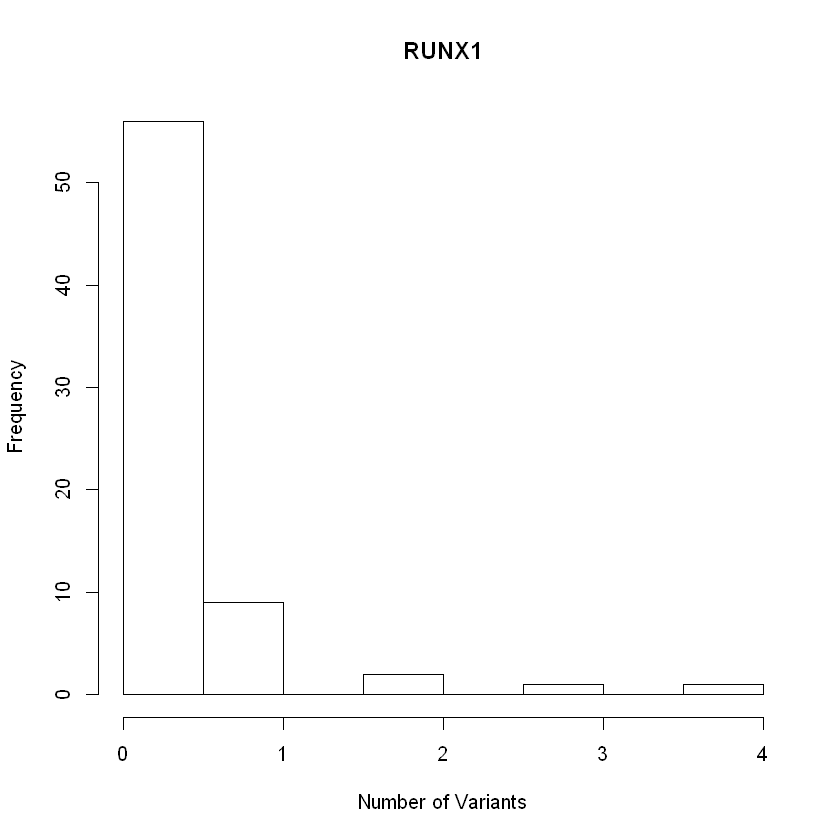

In [15]:
# Replace name of gene in variable below with desired gene
# Note that this code is case sensitive and the gene name must exactly match
gene.desired <- "RUNX1"

# Get the index for the gene in the dataset
gene.desired.index <- which(colnames(data.var) == gene.desired)
# Only output the histogram if the gene exists in the dataset
if (length(gene.desired.index) > 0) {
    hist(data.var[,gene.desired.index], main=gene.desired, xlab="Number of Variants")
} else {
    print("The gene was not found in the dataset.")
}

## Heatmaps

The code below will generate static heatmaps for drug sensitivity and variants. 

### Colors

In [16]:
# Color for variants
color_var <- RColorBrewer::brewer.pal(5, "Oranges")
# Color for drug sensitivity
color_ds <- RColorBrewer::brewer.pal(9, "YlGnBu")

### Data Cleaning

The ComplexHeatmaps package is supposed to allow for NAs in the data, but for some reason, it won't allow them. The code below duplicates the drug sensitivity data and replaces all NAs with 0 in the duplicated set.

In [17]:
# ComplexHeatmaps is supposed to allow for NAs in the data, but for some reason it won't let me have them
# Set NA = 0
# New dataframe to hold modified data
data.drug.noNA <- data.drug
data.drug.noNA[is.na(data.drug)] <- 0
data.drug.noNA[1:5,1:10]

,5-Iodotubercidin,ABT-263,ABT-737,ABT-888,AC-220,Acrichine,Afatinib,AMG232,AMG900,AP24534
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
30,13.53033,12.72024,10.39778,2.302585,2.302585,12.06631,0,0,0,2.302585
39,13.53788,13.47904,13.89564,2.302585,13.729333,12.45710,0,0,0,14.873941
51,13.39024,15.25100,18.54172,11.281814,13.471921,12.79306,0,0,0,14.210036
55,13.40340,15.91924,21.03661,11.435964,12.105323,12.68734,0,0,0,15.049943
59,18.57034,18.48896,19.98133,15.781623,22.332704,12.95262,0,0,0,20.838677


### Drug Sensitivity Heatmap

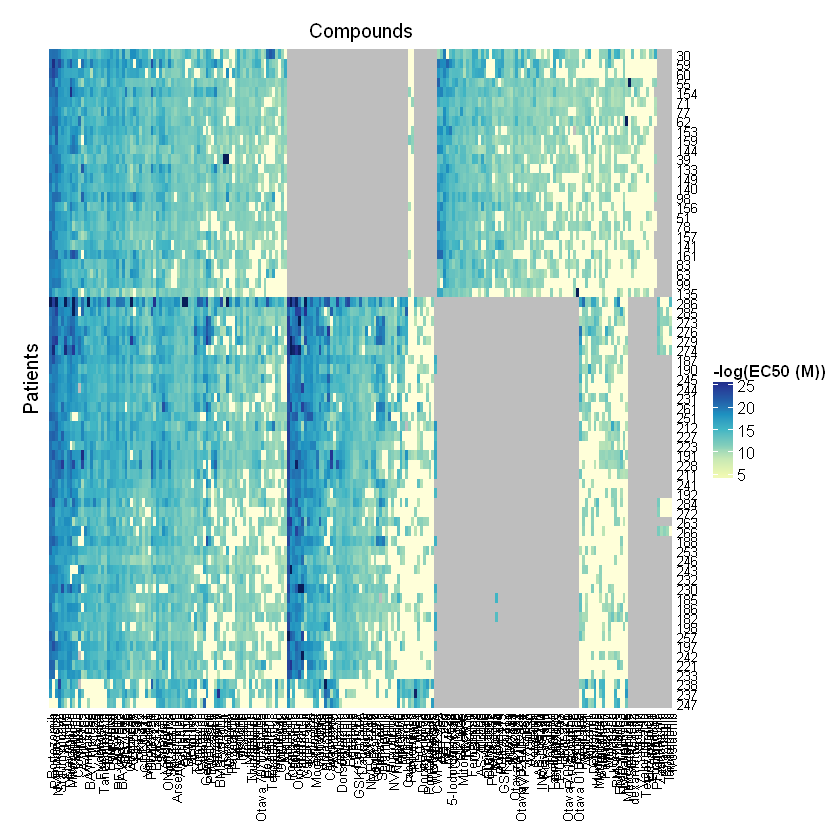

In [18]:
# Create a heatmap with the drug sensitivity data NAs as 0
# Get the clustering from this and use in actual heatmap
ht <- Heatmap(as.matrix(data.drug.noNA))
row_clust <- row_order(ht)
col_clust <- column_order(ht)
Heatmap(as.matrix(data.drug),
        col = color_ds,
        na_col = "gray",
        row_title = "Patients",
        row_title_gp = gpar(fontsize = 12),
        row_names_gp = gpar(fontsize = 8),
        column_title = "Compounds",
        column_title_gp = gpar(fontsize = 12),
        column_names_gp = gpar(fontsize = 8),
        row_order = row_clust,
        column_order = col_clust,
        heatmap_legend_param = list(title = "-log(EC50 (M))")
)

### Variant Heatmap

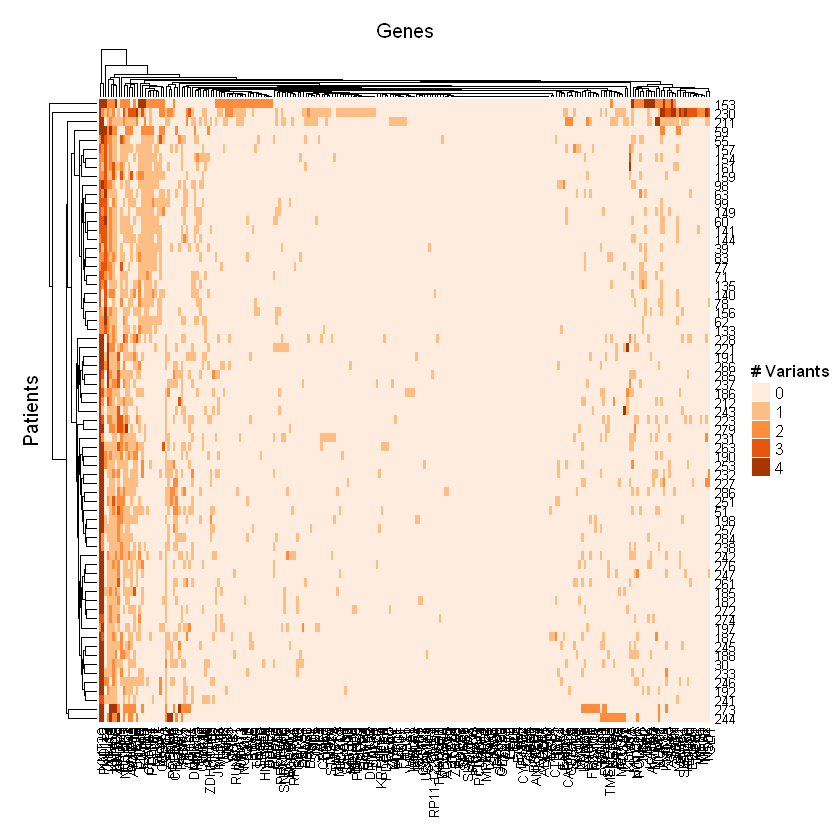

In [19]:
Heatmap(as.matrix(data.var.threshold), col = color_var,
        row_title = "Patients", row_title_gp = gpar(fontsize = 12), row_names_gp = gpar(fontsize = 8),
        column_title = "Genes", column_title_gp = gpar(fontsize = 12), column_names_gp = gpar(fontsize = 8),
        heatmap_legend_param = list(title = "# Variants"))

### Cluster Heatmaps by Patient Variants

In [20]:
# Set up the variant heatmap
var.ht <- Heatmap(as.matrix(data.var.threshold),
                  col=color_var,
                  name="# of Mutations", 
                  row_title = "Patients",
                  row_names_side = "left",
                  row_names_gp = gpar(family="FreeSans", fontsize=8),
                  column_title = "Genes",
                  column_names_gp = gpar(fontsize=8)
)

# Set up the drug sensitivity heatmap
# Use row clustering from variant heatmap
drug.ht <- Heatmap(as.matrix(data.drug),
                   col=color_ds,
                   na_col = "gray",
                   name="-log(EC50 (M))",
                   row_title = "Patients",
                   show_row_names = FALSE,
                   column_title = "Drug Compounds",
                   column_names_gp = gpar(fontsize=8),
                   row_order = row_order(var.ht),
                   column_order = col_clust
)

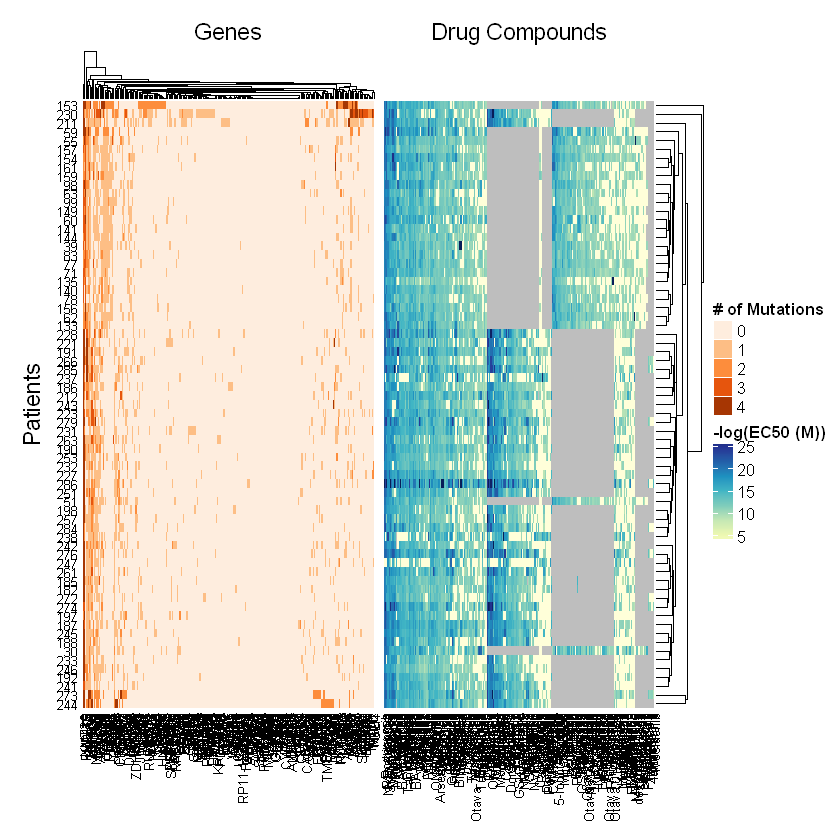

In [21]:
# Combine heatmaps into list
# Variant heatmap clustering dictating drug sensitivity row clustering
# Drug sensitivity heatmap clustered for columns, but it won't show the
# dendogram
ht_list.var <- var.ht + drug.ht
# Show heatmap plot
draw(ht_list.var, row_dend_side="right", row_sub_title_side="left")

### Cluster Heatmaps by Patient Drug Sensitivity

In [22]:
# Set up the drug sensitivity heatmap
drug.ht <- Heatmap(as.matrix(data.drug),
                   col=color_ds, name="-log(EC50 (M))",
                   row_title = "Patients",
                   row_names_side = "left",
                   row_names_gp = gpar(fontsize=8),
                   column_title = "Drug Compounds",
                   column_names_gp = gpar(fontsize=8),
                   row_order = row_clust,
                   column_order = col_clust
)

# Set up the variant heatmap
# Cluster the rows by the order for drug sensitivity
var.ht <- Heatmap(as.matrix(data.var.threshold),
                  col=color_var,
                  name="# of Mutations",
                  row_title = "Patients",
                  show_row_names = FALSE,
                  column_title = "Genes",
                  column_names_gp = gpar(fontsize=8),
                  row_order = row_clust
)

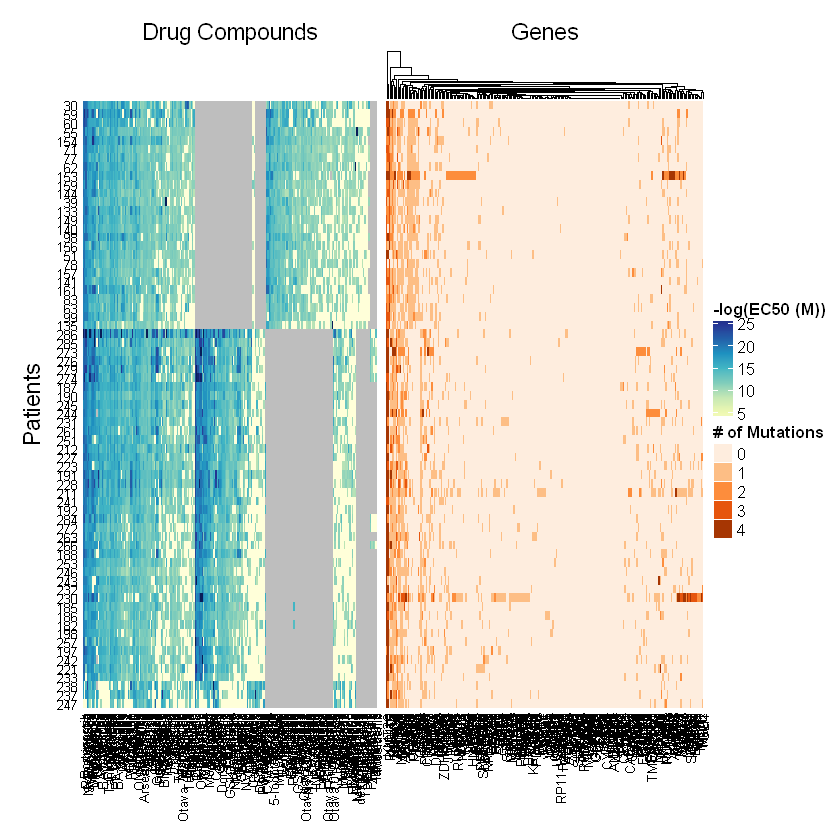

In [23]:
# Combine heatmaps into list
# Variant row clustering matches drug sensitivity row clustering
# Drug sensitivity columns clustered, but not showing dendogram
ht_list.drug <- drug.ht + var.ht
# Show heatmap plot
draw(ht_list.drug, row_dend_side="right", row_sub_title_side="left")

### Vertical Heatmaps

This is an alternative to the side-by-side heatmap.

#### Setup Heatmaps

NOTE: The vertical heatmaps are being set up with the drug sensivity NA values set to 0 for easier clustering and showing dendograms.

In [24]:
# Set up variant heatmap
var.ht.vert <- Heatmap(as.matrix(t(data.var.threshold)),
                       col=color_var,
                       name="# of Mutations",
                       row_title = "Genes",
                       row_names_side = "left",
                       row_names_gp = gpar(fontsize=8),
                       column_title = "Patients",
                       column_names_gp = gpar(fontsize=8),
                       column_names_side = "bottom",
                       row_dend_side = "right"
)

# Set up drug sensivity heatmap
drug.ht.vert <- Heatmap(as.matrix(t(data.drug.noNA)),
                        col=color_ds, name="-log(EC50 (M))",
                        row_title = "Drug Compounds",
                        row_names_side = "left",
                        row_names_gp = gpar(fontsize=8),
                        column_title = "Patients",
                        column_names_gp = gpar(fontsize=8),
                        column_names_side = "bottom",
                        row_dend_side = "right"
)

#### Cluster by Patient Variants

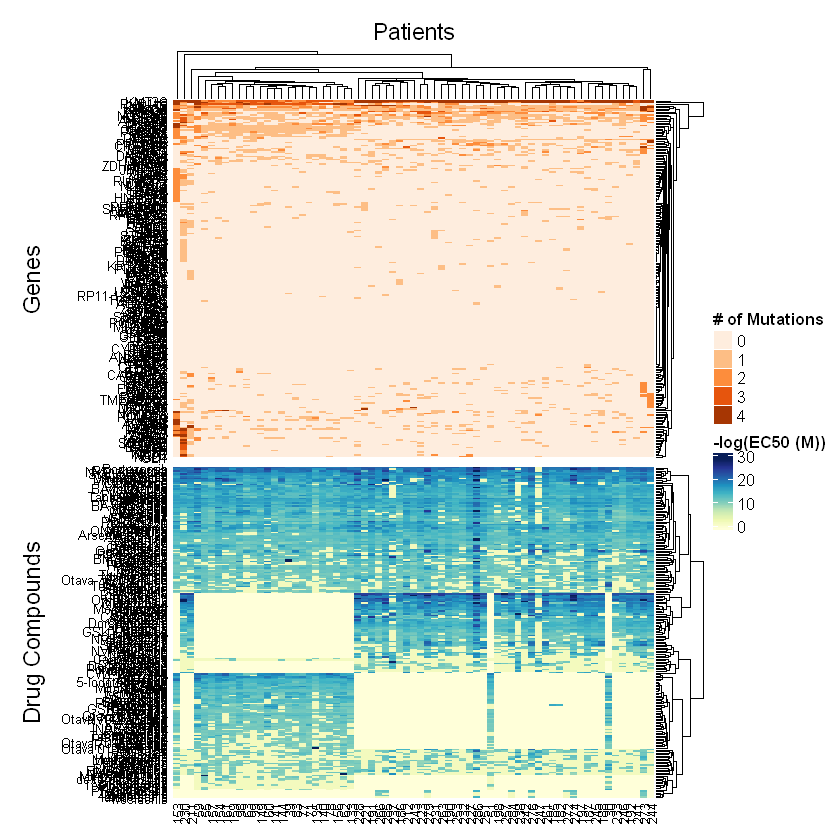

In [25]:
# Combine heatmaps into a list
# First heatmap dominates column clustering
ht_vert <- var.ht.vert %v% drug.ht.vert
# Show heatmap plot
draw(ht_vert, row_dend_side="right", row_sub_title_side="left")

#### Cluster by Patient Drug Sensitivity

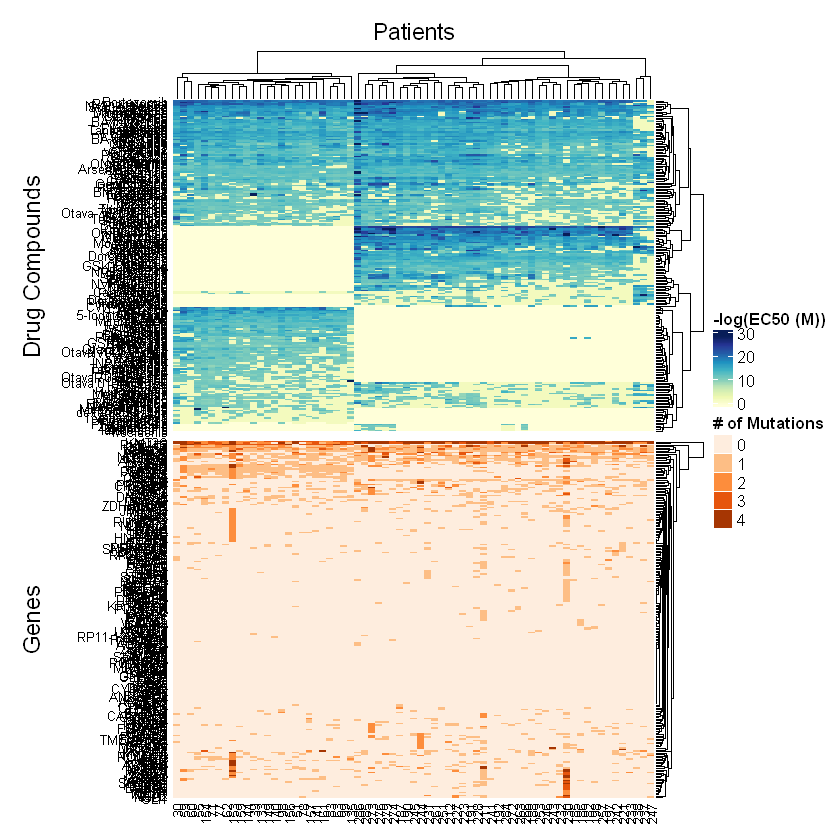

In [26]:
# Combine heatmaps into a list
# First heatmap dominates column clustering
ht_vert <- drug.ht.vert %v% var.ht.vert
# Show heatmap plot
draw(ht_vert, row_dend_side="left", row_sub_title_side="left")

## Two Sample t-Test

The t-Test used is a [Welch](https://en.wikipedia.org/wiki/Welch%27s_t-test) two-sided, two sample t-Test, in which the variance of patients with the variants and patients without the variants are assumed to be unequal. Confidence interval default at 0.95.

The t-Test splits the patient data by those who have the variant and those who do not. This test requires a minimum of two patients in each group. As such, the default could be set to 2 for the minimum number of patients and n-2 for the maximum number of patients. As stated before, a more balanced test would be better, which is why the current defaults are at 2 and n-2, respectively.

### Setup


In [27]:
# t-Test thresholds for number of patients that have (or don't have) variant
min.num.patients.ttest <- 2
max.num.patients.ttest <- dim(data.var)[1] - 2

In [28]:
# Remove genes that are outside the range of allowable sample size
genes.sum <- apply(data.var, 2, function (x) {length(which(x > 0))})
genes.remove <- which(genes.sum < min.num.patients.ttest)
genes.remove <- c(genes.remove, which(genes.sum > max.num.patients.ttest))
if (length(genes.remove) > 0) {
 data.var.sample <- data.var[,-genes.remove]   
} else {
 data.var.sample <- data.var
}

In [29]:
# Remove drugs that have all the same value
drug.val.unique <- apply(data.drug, 2, function (x) {length(unique(x[!is.na(x)]))})
drug.remove <- which(drug.val.unique < 2)
if (length(drug.remove) > 0) {
 data.drug.diff <- data.drug[,-drug.remove]   
} else {
 data.drug.diff <- data.drug
}

### t-Test

In [30]:
# Table to hold p-values
ttest.pval <- data.frame(matrix(nrow=ncol(data.var.sample), ncol=ncol(data.drug.diff)))
rownames(ttest.pval) <- colnames(data.var.sample)
colnames(ttest.pval) <- colnames(data.drug.diff)

# Table to hold t-statistic
ttest.tstat <- data.frame(matrix(nrow=ncol(data.var.sample), ncol=ncol(data.drug.diff)))
rownames(ttest.tstat) <- colnames(data.var.sample)
colnames(ttest.tstat) <- colnames(data.drug.diff)

# Table to hold D.O.F. for t-statistic
ttest.dof <- data.frame(matrix(nrow=ncol(data.var.sample), ncol=ncol(data.drug.diff)))
rownames(ttest.dof) <- colnames(data.var.sample)
colnames(ttest.dof) <- colnames(data.drug.diff)

# Table to hold estimated difference in means (mean(x) - mean(y), where x is patients with variant 
# and y is patients without variant; positive estimated difference means variants had higher drug activity)
ttest.estdif <- data.frame(matrix(nrow=ncol(data.var.sample), ncol=ncol(data.drug.diff)))
rownames(ttest.estdif) <- colnames(data.var.sample)
colnames(ttest.estdif) <- colnames(data.drug.diff)

In [31]:
for (i in 1:nrow(ttest.pval)) {
  # Get the indices for patients that have one or more mutations for the gene
  pat.var <- which(data.var.sample[,i] > 0)
  # t-test for all drugs
  for (j in 1:ncol(ttest.pval)) {
    drug.var1 <- data.drug.diff[pat.var,j]
    drug.var0 <- data.drug.diff[-pat.var,j]
    # Check that each subset is not all NA. If one is, then just put NA for p-value. 
    if (sum(is.na(drug.var1)) == length(drug.var1) ||
        sum(is.na(drug.var0)) == length(drug.var0)) {
        # NA drug sensitivity for all variant patients or all nonvariant patients
        ttest.pval[i,j] <- NA
        ttest.tstat[i,j] <- NA
        ttest.dof[i,j] <- NA
        ttest.estdif[i,j] <- NA
    } else if (length(unique(drug.var1[!is.na(drug.var1)])) < 2 ||
               length(unique(drug.var0[!is.na(drug.var0)])) < 2) {
        # Drug sensitivity the same for all nonvariant patients or all variant patients
        ttest.pval[i,j] <- NA
        ttest.tstat[i,j] <- NA
        ttest.dof[i,j] <- NA
        ttest.estdif[i,j] <- NA
    } else { # Run the test if neither are all NA values
        ttest.temp <- t.test(drug.var1, drug.var0, paired=FALSE, 
                                  var.equal=FALSE, na.action=na.omit() )
        ttest.pval[i,j] <- ttest.temp$p.value
        ttest.tstat[i,j] <- ttest.temp$statistic
        ttest.dof[i,j] <- ttest.temp$parameter
        ttest.estdif[i,j] <- ttest.temp$estimate[[1]] - ttest.temp$estimate[[2]]        
    }
  }
}

In [32]:
# Display section of tables to ensure it ran correctly
# P-values
print("P-Value")
ttest.pval[1:5,1:10]
print("t-Statistic")
ttest.tstat[1:5,1:10]
print("Degrees of Freedom")
ttest.dof[1:5,1:10]
print("Estimated Difference in Means")
ttest.estdif[1:5,1:10]

[1] "P-Value"


,5-Iodotubercidin,ABT-263,ABT-737,ABT-888,AC-220,Acrichine,Afatinib,AMG232,AMG900,AP24534
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABCC1,0.56725206,0.4015489,0.3773868,0.03693972,0.2886554,0.29739636,0.21598804,0.31968822,0.6573619,0.6441302
ABL1,0.01077301,0.3671915,0.6955807,0.61350799,0.1441946,0.00332108,0.53467398,0.89977565,0.2368929,0.4423126
ADRBK1,NA,NA,NA,NA,0.5391699,0.45733020,0.51263986,0.01494282,0.8521257,NA
AFF1,NA,NA,NA,NA,0.6901789,0.77666215,0.08908212,0.61924230,0.3172700,NA
AKAP13,0.61451748,0.2165090,0.2320518,0.29889203,0.3052000,0.93866053,0.29548406,0.47514979,0.3638936,0.2741404


[1] "t-Statistic"


,5-Iodotubercidin,ABT-263,ABT-737,ABT-888,AC-220,Acrichine,Afatinib,AMG232,AMG900,AP24534
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABCC1,-0.5885731,-0.9316941,-0.9645664,-2.1847522,-1.0854623,1.06484264,1.2595877,1.0164638,-0.4492816,-0.471690
ABL1,2.7650843,1.1930793,0.5131030,0.5077558,1.4782921,-3.04686719,-0.6631451,0.1314385,1.2950708,1.195065
ADRBK1,NA,NA,NA,NA,-0.6869559,-0.82335839,0.6705121,2.5435181,0.2091797,NA
AFF1,NA,NA,NA,NA,-0.5150177,0.35959278,2.0160396,-0.6776087,1.0124308,NA
AKAP13,-0.5103114,-1.2880175,-1.2351405,-1.0478144,-1.0332687,-0.07724301,1.0676711,-0.7218272,0.9244737,-1.139000


[1] "Degrees of Freedom"


,5-Iodotubercidin,ABT-263,ABT-737,ABT-888,AC-220,Acrichine,Afatinib,AMG232,AMG900,AP24534
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABCC1,11.79062,4.230360,5.207797,29.68819,23.655376,24.341794,35.713062,23.666019,23.402003,14.578217
ABL1,23.97099,1.789185,1.039355,59.30215,64.526943,66.109934,5.364101,5.928009,6.908379,1.008365
ADRBK1,NA,NA,NA,NA,3.158203,3.930063,15.125860,40.007213,2.196657,NA
AFF1,NA,NA,NA,NA,1.111180,1.081544,6.170757,1.017954,40.999116,NA
AKAP13,23.88409,15.607900,18.725561,60.50225,66.882587,66.972670,25.995671,35.341029,25.536930,13.763249


[1] "Estimated Difference in Means"


,5-Iodotubercidin,ABT-263,ABT-737,ABT-888,AC-220,Acrichine,Afatinib,AMG232,AMG900,AP24534
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABCC1,-0.3631847,-2.790582,-1.663411,-2.5350052,-1.411394,0.19532298,0.8005815,1.3255985,-0.8418753,-0.4836373
ABL1,1.0394912,1.748241,2.109608,0.5606572,1.497498,-0.40897248,-1.4100646,0.3009296,3.2065591,7.1299200
ADRBK1,NA,NA,NA,NA,-2.204354,-0.17852423,0.3873947,1.7285212,0.9032659,NA
AFF1,NA,NA,NA,NA,-1.190225,0.13810447,1.1877572,-4.3548836,0.9613138,NA
AKAP13,-0.3519826,-1.842899,-1.467507,-1.1403253,-1.023363,-0.01098877,1.0188950,-0.8912608,1.8101806,-1.4798205


In [33]:
write.csv(ttest.pval, paste0(config$output.dir, "ttest_pvalues.csv"))
write.csv(ttest.estdif, paste0(config$output.dir, "ttest_estdif.csv"))

### Heatmaps for t-Test results

In [34]:
# Setup for heatmaps
# Create a copy of the estimated differences
ttest.estdif.temp <- ttest.estdif
# Set all NA values to 0
ttest.estdif.temp[is.na(ttest.estdif.temp)] <- 0
# Create a copy of the p-values
ttest.pval.temp <- ttest.pval
# Set all NA values to 1
ttest.pval.temp[is.na(ttest.pval.temp)] <- 1

In [35]:
# Colors
# P-value
colors_pval <- rev(RColorBrewer::brewer.pal(9,"Blues"))
# Mean differences
colors_mdif <- RColorBrewer::brewer.pal(9, "PRGn")

#### Cluster Heatmaps by Genes

In [36]:
# Make heatmap for p-values and use clustering for mean diff heatmap
ht <- Heatmap(as.matrix(ttest.pval.temp))
row_clust <- row_order(ht)
col_clust <- column_order(ht)

# Heatmap of p-values
ht.pval <- Heatmap(as.matrix(ttest.pval),
                   col=colors_pval,
                   na_col = "gray",
                   name="p-value", 
                   row_title = "Genes",
                   row_names_side = "left",
                   row_names_gp = gpar(fontsize=8),
                   column_title = "Drug Compounds",
                   column_names_gp = gpar(fontsize=8),
                   row_order = row_clust,
                   column_order = col_clust
)

# Heatmap of estimated differences 
ht.est <- Heatmap(as.matrix(ttest.estdif),
                  col=colors_mdif,
                  na_col = "gray",
                  name="Mean Difference", 
                  row_title = "Genes",
                  show_row_names = FALSE,
                  column_title = "Drug Compounds",
                  column_names_gp = gpar(fontsize=8),
                   row_order = row_clust,
                   column_order = col_clust
)

In [37]:
# Combine heatmaps into a list where pval gene clustering dominates rowss
ht.est.pval <- ht.pval + ht.est
### NOTE: Remove this line/make it generic; had to put exact directory because windows...
png(paste0(config$output.dir, "Pval_MeanDiff_ClustGene.png"), height = 1500, width = 1500, unit = "px")
draw(ht.est.pval, row_dend_side="right", row_sub_title_side="left")
graphics.off()

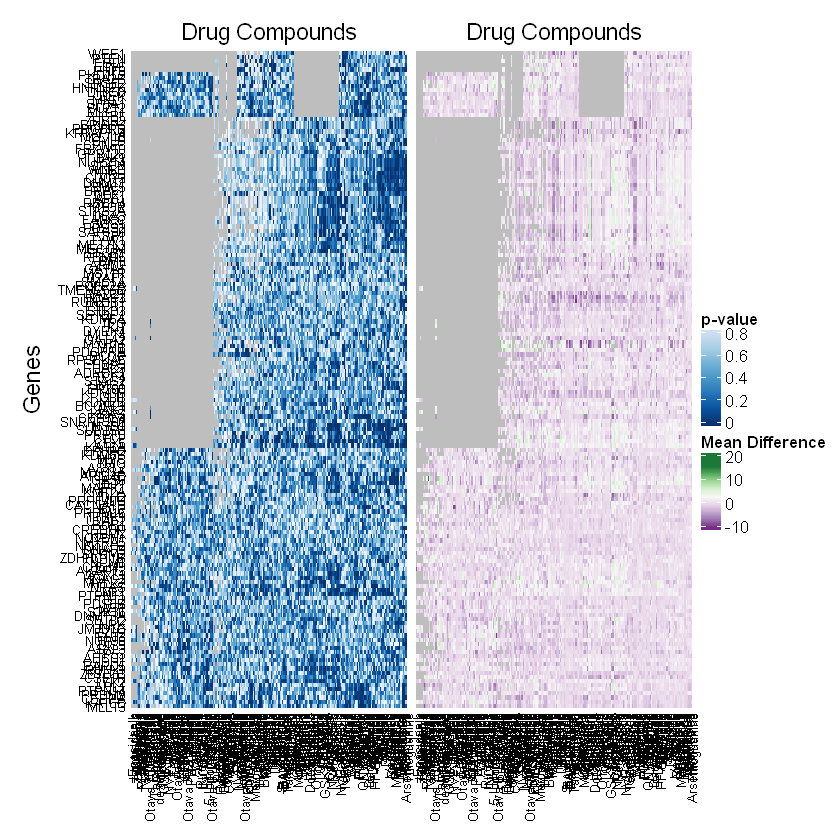

In [38]:
# Combine heatmaps into a list where pval gene clustering dominates rowss
# NOTE: Both row and column clustering dictated by p-value heatmap
# Dendograms not shown
ht.est.pval <- ht.pval + ht.est
draw(ht.est.pval, row_dend_side="right", row_sub_title_side="left")

#### Cluster Heatmaps by Drug Compounds

In [39]:
# Make heatmap for p-values and use clustering for mean diff heatmap
ht <- Heatmap(as.matrix(t(ttest.pval.temp)))
row_clust <- row_order(ht)
col_clust <- column_order(ht)

# Heatmap of estimated differences
ht.est.t <- Heatmap(as.matrix(t(ttest.estdif)),
                    col=colors_mdif,
                    na_col = "gray",
                    name="Mean Difference", 
                    row_title = "Drug Compounds",
                    show_row_names = FALSE,
                    column_title = "Genes",
                    column_names_gp = gpar(fontsize=8),
                    row_order = row_clust,
                    column_order = col_clust
)

# Heatmap of p-values
ht.pval.t <- Heatmap(as.matrix(t(ttest.pval)),
                     col=colors_pval,
                     na_col = "gray",
                     name="p-value",
                     row_title = "Drug Compounds",
                     row_names_side = "left",
                     row_names_gp = gpar(fontsize=8),
                     column_title = "Genes",
                     column_names_gp = gpar(fontsize=8),
                     row_order = row_clust,
                     column_order = col_clust
)

In [40]:
# Combine heatmaps into a list where pval drug clustering dominates rows
ht.est.pval.t <- ht.pval.t + ht.est.t
### NOTE: Remove this line/make it generic; had to put exact directory because windows...
png(paste0(config$output.dir,"Pval_MeanDiff_ClustDrug.png"), height = 1500, width = 1500, unit = "px")
draw(ht.est.pval.t, row_dend_side="right", row_sub_title_side="left")
graphics.off()

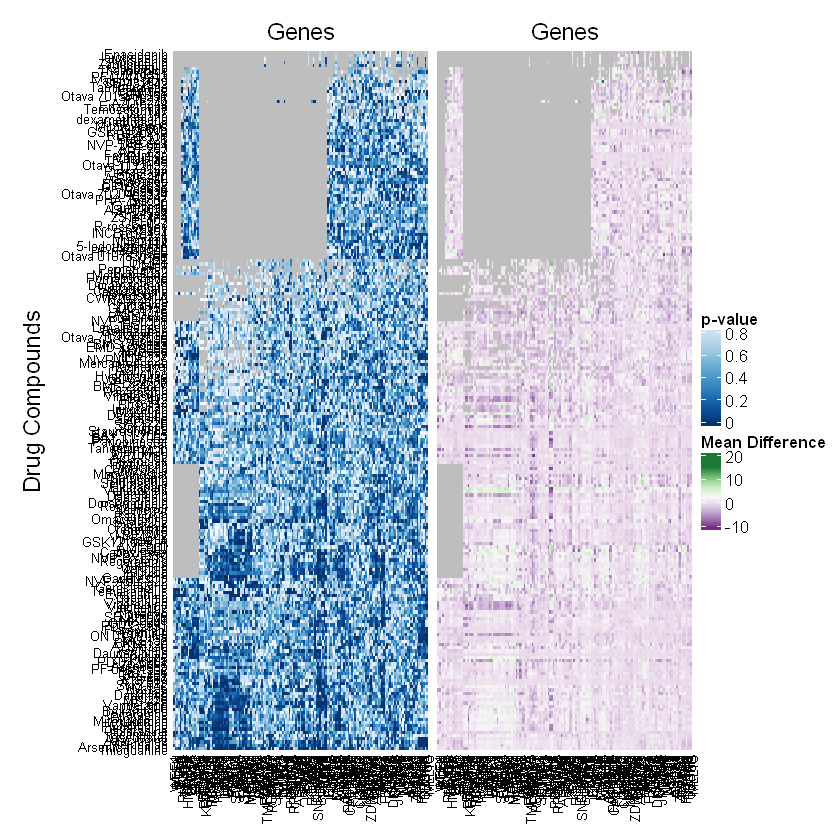

In [41]:
# Combine heatmaps into a list where pval drug clustering dominates rows
# NOTE: both heatmap row and column clustering dependent on p-value heatmap
# Dendogram not shown
ht.est.pval.t <- ht.pval.t + ht.est.t
draw(ht.est.pval.t, row_dend_side="right", row_sub_title_side="left")

### Histograms of t-Test Results

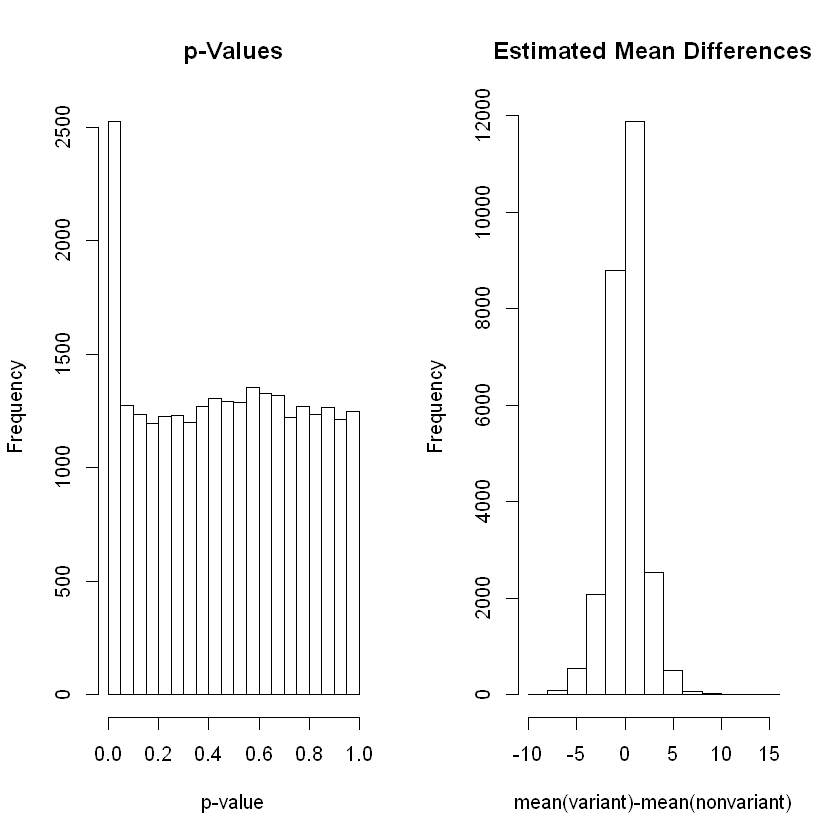

In [42]:
# Display p-value and mean difference histograms side-by-side
# Set the display to 1 row, 2 columns
par(mfrow=c(1,2))
# Histogram of p-values from t-Test
hist(unlist(ttest.pval), main="p-Values", xlab="p-value", )
# Histogram of estimated mean difference from t-Test
hist(unlist(ttest.estdif), main="Estimated Mean Differences", xlab="mean(variant)-mean(nonvariant)")

### Top Significant Gene-Drug Pairs

In [43]:
# Table to hold significant gene-drug pair information
top.pairs <- data.frame(Gene = character(), Compound = character(), 
                        p.Value = numeric(), Mean.Difference = numeric(),
                        t.Statistic = numeric(), Degrees.of.Freedom = numeric(), 
                        Num.Variants = numeric(), Num.Non.variants = numeric(), 
                        stringsAsFactors=FALSE, check.names=FALSE)

In [44]:
# Unlist p-values and sort 
pvalues <- unlist(ttest.pval)
pvalues <- sort(pvalues)
# Truncate values above alpha
pvalues <- pvalues[pvalues < config$alpha]

In [45]:
# Search for lowest p-value pairs; assumption that there is only a single match per p-value
# This is not quite accurate, but relatively reasonable
# In example run, there were 1396 pvalues < alhpa and 1318 were unique
# Most likely, duplicate values would happen more often for less significant p-values
# Due to this assumption, only use unique values
pvalues <- unique(pvalues)
for (i in 1:length(pvalues)) {
    # Get index for gene
    gene.ind <- which( apply(ttest.pval, 1, function (x) { pvalues[i] %in% x }) == TRUE)[[1]]
    # Get index for drug
    drug.ind <- which( apply(ttest.pval, 2, function (x) { pvalues[i] %in% x }) == TRUE)[[1]]
    # Get the patients that have a variant in the gene
    pat.var <- which(data.var.sample[,gene.ind] > 0)
    # Temp dataframe for data
    # Table to hold significant gene-drug pair information
    top.pair.temp <- data.frame( Gene = rownames(ttest.pval)[gene.ind], 
                                 Compound = colnames(ttest.pval)[drug.ind],
                                 p.Value = ttest.pval[gene.ind, drug.ind], 
                                 Mean.Difference = ttest.estdif[gene.ind, drug.ind],
                                 t.Statistic = ttest.tstat[gene.ind, drug.ind], 
                                 Degrees.of.Freedom = ttest.dof[gene.ind, drug.ind], 
                                 Num.Variants = sum(!is.na(data.drug.diff[pat.var,drug.ind])), 
                                 Num.Non.variants = sum(!is.na(data.drug.diff[-pat.var,drug.ind])), 
                                 stringsAsFactors=FALSE)
    # Add the vector to the dataframe
    top.pairs <- rbind(top.pairs, top.pair.temp)
}

In [46]:
# Display section of dataframe to check that it worked correctly
head(top.pairs)

,Gene,Compound,p.Value,Mean.Difference,t.Statistic,Degrees.of.Freedom,Num.Variants,Num.Non.variants
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,MYH11,SGI-1776,7.347251e-18,3.732308,11.747808,66.32612,2,67
2,DDX1,Belinostat,8.288479e-17,-2.124515,-11.111423,66.54113,2,67
3,HNRNPK,NVP-LDE-225,7.572628e-14,5.019010,9.588029,61.84715,2,67
4,AFF1,Lomustine,1.558899e-13,4.834559,9.238629,66.38046,2,67
5,ETV6,Pentostatin,8.561116e-13,5.152576,9.227921,55.39502,2,67
6,STK32A,Decitabine,1.046288e-12,5.027556,8.782900,66.08922,2,67


In [47]:
# Filter top significant pairs by number of patients in each set
# Remove pairs with <= 5 patients with variants
top.pairs.temp <- top.pairs[top.pairs[,7] >= 5,]
# Remove pairs with <= 5 patients without variants
top.pairs.temp <- top.pairs.temp[top.pairs.temp[,8] >= 5,]

#### Top Significant Pairs with High Drug Sensitivity in Variant Patients

In [48]:
# Remove pairs where the mean difference is < 0 (i.e. the drug performed worse if the patient had the variant)
top.pairs.pos <- top.pairs.temp[top.pairs.temp[,4] > 0,]
# Display top 30 pairs
top.pairs.pos[1:30,]

,Gene,Compound,p.Value,Mean.Difference,t.Statistic,Degrees.of.Freedom,Num.Variants,Num.Non.variants
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
39,CBX5,PLX-4720,2.083050e-09,4.431658,6.969830,64.12704,5,64
47,SUZ12,MLN8237,5.308503e-09,4.371314,6.704825,66.30523,12,57
65,STAG2,GDC-0449,5.509965e-08,3.747083,6.120748,66.81629,9,60
79,CBX5,Vinblastine,2.471990e-07,2.408661,5.767759,64.45669,5,64
82,CBX5,Pazopanib,4.009765e-07,5.438542,6.829614,24.62539,5,64
89,SUZ12,Gefitinib,6.464894e-07,3.414423,5.507357,65.90647,12,57
94,CBX5,Vincristine,7.901963e-07,1.933121,5.476943,63.50933,5,64
122,SUPT5H,Daunorubicin,4.556161e-06,2.277795,5.624345,28.86397,7,62
134,PTPN11,Masitinib,7.725333e-06,3.699563,5.059369,44.51579,9,60


#### Top Significant Pairs with Low Drug Sensitivity in Variant Patients

In [49]:
# Remove pairs where the mean difference is > 0 (i.e. the drug performed better if the patient had the variant)
top.pairs.neg <- top.pairs.temp[top.pairs.temp[,4] < 0,]
# Display top 20 pairs
top.pairs.neg[1:20,]

,Gene,Compound,p.Value,Mean.Difference,t.Statistic,Degrees.of.Freedom,Num.Variants,Num.Non.variants
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
151,SF3A1,Acrichine,1.702647e-05,-0.5543271,-4.782491,47.70080,15,54
165,CEP164,Acrichine,2.599681e-05,-0.5370821,-4.551808,60.87934,27,42
245,BCR,NVP-LDE-225,1.062554e-04,-3.8811036,-4.170645,56.17195,38,31
262,PDS5B,AZD-6244,1.581588e-04,-5.0091416,-4.415454,25.91834,19,9
269,DEK,Acrichine,1.780221e-04,-0.5169781,-4.326561,27.64723,10,59
289,SF3A1,PIK-75,2.275754e-04,-1.1179325,-3.928883,58.63215,15,54
298,PRDM16,NVP-LDE-225,2.719277e-04,-3.4477433,-4.048570,34.92881,13,56
320,CEP164,PIK-75,3.411491e-04,-1.1968045,-3.788902,62.88473,27,42
322,MLLT3,Azacitidine,3.508131e-04,-1.1857547,-3.832891,50.70962,37,32


#### Individual Gene vs Two Drugs

This section allows for visualizing the relationship between an individual gene and two different drugs by replacing the values in the following box with the desired gene and drugs.

In [50]:
## Replace the following two variables with the gene and drug, respectively.
## Note: case is not important, but spelling is.
gene <- "RUNX1"
drug1 <- "amg232"
drug2 <- "bortezomib"
ind.drug1 <- which(tolower(colnames(ttest.pval)) == tolower(drug1))
ind.drug2 <- which(tolower(colnames(ttest.pval)) == tolower(drug2))
ind.gene <- which(tolower(rownames(ttest.pval)) == tolower(gene))
paste0(drug1, " - p-value: ",
       ttest.pval[ind.gene, ind.drug1],
       " mean difference: ", ttest.estdif[ind.gene, ind.drug1]
)
paste0(drug2,
       " - p-value: ",
       ttest.pval[ind.gene, ind.drug2],
       " mean difference: ", ttest.estdif[ind.gene, ind.drug2]
)

[1] "amg232 - p-value: 0.290974425808256 mean difference: 1.07217167035704"

[1] "bortezomib - p-value: 0.963476481172427 mean difference: 0.0202059132156727"

In [51]:
# Getting the indices
ind.drug1.f <- which(tolower(colnames(data.drug)) == tolower(drug1))
ind.drug2.f <- which(tolower(colnames(data.drug)) == tolower(drug2))
ind.gene.f <- which(tolower(colnames(data.var)) == tolower(gene))

In [52]:
# Making a table with just the two drugs
# First make a table with variant patients
pat.var <- which(data.var[,ind.gene.f] > 0)
data.gene.drug.var <- cbind(
    data.drug[pat.var, ind.drug2.f],
    data.drug[pat.var, ind.drug1.f]
)
colnames(data.gene.drug.var) <- c(drug2, drug1)
rownames(data.gene.drug.var) <- rownames(data.var)[pat.var]
# Next make table with nonvariant patients
data.gene.drug.nonvar <- cbind(
    data.drug[-pat.var, ind.drug2.f],
    data.drug[-pat.var, ind.drug1.f]
)
colnames(data.gene.drug.nonvar) <- c(drug2, drug1)
rownames(data.gene.drug.nonvar) <- rownames(data.var)[-pat.var]
# Combine variant and nonvariant tables
data.gene.drug <- rbind(data.gene.drug.var, data.gene.drug.nonvar)

In [53]:
# This is for making the annotation showing which patients have
# the variant and which do not
col_ann <- c(replicate(13,1), integer(56))
data.ann <- data.frame(variant = col_ann)
rownames(data.ann) <- c(rownames(data.var)[pat.var], rownames(data.var)[-pat.var])

In [54]:
# Make heatmap and print
htmp_ann <- ComplexHeatmap::rowAnnotation(df = data.frame(Variant = c(rep("1", 13), rep("0", 56))), 
    col = list(Variant = c("1" =  "Orange", "0" = "black")), width = unit(0.5, "cm"))
png(filename = glue::glue("{config$output.dir}{gene}_{drug1}_{drug2}_Heatmap.png"), 
    width = 600, height = 800, units = "px")
Heatmap(as.matrix(data.gene.drug), 
        name = "-log(EC50 (M))",
        col = color_ds, 
        row_names_side = "left",
        cluster_rows = FALSE, 
        column_names_side = "top",
        column_names_gp = gpar(fontsize = 12),
        cluster_columns = FALSE,
        row_names_gp = gpar(fontsize=12)) + htmp_ann
graphics.off()

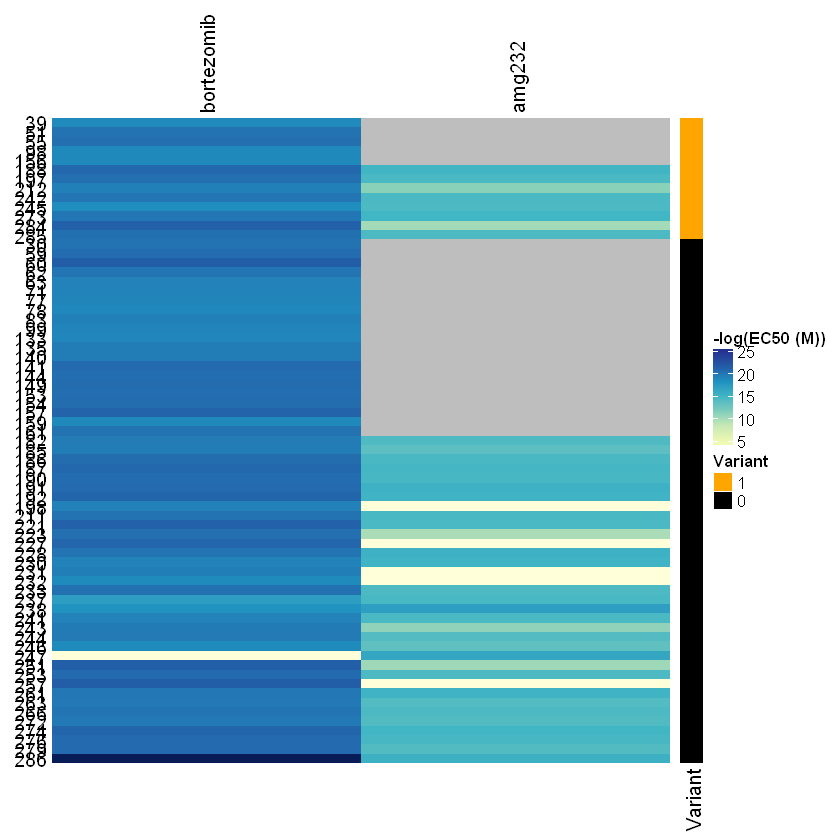

In [55]:
# Display heatmap
Heatmap(as.matrix(data.gene.drug), 
        name = "-log(EC50 (M))",
        col = color_ds,
        na_col = "gray",
        row_names_side = "left",
        cluster_rows = FALSE, 
        column_names_side = "top",
        column_names_gp = gpar(fontsize = 12),
        cluster_columns = FALSE,
        row_names_gp = gpar(fontsize=12)) + htmp_ann

## Correlation

In [56]:
data.var.01 <- data.var
for (row in 1:nrow(data.var.01)) {
    for (col in 1:ncol(data.var.01)) {
        if (!is.na(data.var.01[row, col]) && data.var.01[row, col] > 0) {
            data.var.01[row, col] <- 1
        }
    }
}

In [57]:
quick.corr <- cor(data.var.01, data.drug, use = "pairwise.complete.obs", method = "pearson")
head(quick.corr)

Warning message in cor(data.var.01, data.drug, use = "pairwise.complete.obs", method = "pearson"):
"the standard deviation is zero"


,5-Iodotubercidin,ABT-263,ABT-737,ABT-888,AC-220,Acrichine,Afatinib,AMG232,AMG900,AP24534,...,Venetoclax,Vinblastine,Vincristine,Vinorelbine,Volasertib,Vorinostat,XL-147,YM-155,Zanubrutinib,ZSTK-474
42983,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AATK,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABCC1,-0.08300817,-0.3183953,-0.2254619,-0.24640025,-0.1442768,0.1387237,0.1259187,0.14549457,-0.06517974,-0.06191487,...,0.21938182,0.06732224,-0.05949898,-0.15938181,0.11823314,0.16259704,0.05127072,0.001279639,-0.3670018,-0.003374696
ABHD15,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABL1,0.16063496,0.1348649,0.1933309,0.06269408,0.1761090,-0.3341628,-0.1713281,0.02551554,0.19178255,0.61714304,...,0.04723611,-0.02408007,-0.19902218,-0.07722907,0.09169227,-0.01714746,0.20824214,0.001784056,-0.2524567,-0.152743051
ACER1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [58]:
write.csv(quick.corr, paste0(config$output.dir, "corr_values.csv"))

In [59]:
# Combine top 50 t-test results and correlation results
top_sig_pairs_corr_pos <- top.pairs.pos[1:50, -c(5,6)]
top_sig_pairs_corr_neg <- top.pairs.neg[1:50, -c(5,6)]
top_sig_pairs_corr_pos_list <- purrr::map2(
    top_sig_pairs_corr_pos$Gene,
    top_sig_pairs_corr_pos$Compound,
    function(x, y) {
        quick.corr[x, y]
    }
)
top_sig_pairs_corr_neg_list <- purrr::map2(
    top_sig_pairs_corr_neg$Gene,
    top_sig_pairs_corr_neg$Compound,
    function(x, y) {
        quick.corr[x, y]
    }
)
top_sig_pairs_corr_pos <- tibble::add_column(top_sig_pairs_corr_pos, Correlation = as.numeric(top_sig_pairs_corr_pos_list))
top_sig_pairs_corr_neg <- tibble::add_column(top_sig_pairs_corr_neg, Correlation = as.numeric(top_sig_pairs_corr_neg_list))

In [60]:
head(top_sig_pairs_corr_pos)
head(top_sig_pairs_corr_neg)

,Gene,Compound,p.Value,Mean.Difference,Num.Variants,Num.Non.variants,Correlation
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>
39,CBX5,PLX-4720,2.083050e-09,4.431658,5,64,0.2429608
47,SUZ12,MLN8237,5.308503e-09,4.371314,12,57,0.3702231
65,STAG2,GDC-0449,5.509965e-08,3.747083,9,60,0.2953917
79,CBX5,Vinblastine,2.471990e-07,2.408661,5,64,0.1931476
82,CBX5,Pazopanib,4.009765e-07,5.438542,5,64,0.2798637
89,SUZ12,Gefitinib,6.464894e-07,3.414423,12,57,0.3096265


,Gene,Compound,p.Value,Mean.Difference,Num.Variants,Num.Non.variants,Correlation
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>
151,SF3A1,Acrichine,1.702647e-05,-0.5543271,15,54,-0.3768598
165,CEP164,Acrichine,2.599681e-05,-0.5370821,27,42,-0.4320344
245,BCR,NVP-LDE-225,1.062554e-04,-3.8811036,38,31,-0.4628969
262,PDS5B,AZD-6244,1.581588e-04,-5.0091416,19,9,-0.5561258
269,DEK,Acrichine,1.780221e-04,-0.5169781,10,59,-0.2999641
289,SF3A1,PIK-75,2.275754e-04,-1.1179325,15,54,-0.2950357


In [61]:
write.csv(top_sig_pairs_corr_pos, paste0(config$output, "TopPairs_Sensitivity.csv"), row.names = FALSE)
write.csv(top_sig_pairs_corr_neg, paste0(config$output, "TopPairs_Resistance.csv"), row.names = FALSE)

##### Tables for top correlation gene-drug pairs

In [62]:
# Table to hold significant gene-drug pair information
corr.top.pairs <- data.frame(Gene = character(), Compound = character(), 
                             Correlation = numeric(),
                             Num.Variants = numeric(), Num.Non.variants = numeric(),
                             stringsAsFactors=FALSE, check.names=FALSE)

In [64]:
# Unlist correlation values and sort 
corr.values <- unlist(quick.corr)
corr.values <- sort(corr.values)

In [65]:
# Find the gene-drug pairs with highest correlation, positive and negative
# Assuming the highest correlated gene-drug pairs have unique
# correlation, but this assumption is most likely inaccurate.
# However, it should be good enough.
corr.values <- unique(corr.values)
for (i in 1:length(corr.values)) {
    # Get index for gene
    gene.ind <- which( apply(quick.corr, 1, function (x) { corr.values[i] %in% x }) == TRUE)[[1]]
    # Get index for drug
    drug.ind <- which( apply(quick.corr, 2, function (x) { corr.values[i] %in% x }) == TRUE)[[1]]
    # Get the patients that have a variant in the gene
    pat.var <- which(data.var[,gene.ind] > 0)
    # Temp dataframe for data
    # Table to hold significant gene-drug pair information
    top.pair.temp <- data.frame( Gene = rownames(quick.corr)[gene.ind], 
                                 Compound = colnames(quick.corr)[drug.ind],
                                 Correlation = quick.corr[gene.ind, drug.ind],
                                 Num.Variants = sum(!is.na(data.drug[pat.var,drug.ind])), 
                                 Num.Non.variants = sum(!is.na(data.drug[-pat.var,drug.ind])), 
                                 stringsAsFactors=FALSE)
    # Add the vector to the dataframe
    corr.top.pairs <- rbind(corr.top.pairs, top.pair.temp)
}

In [66]:
# Filter top significant pairs by number of patients in each set
# Remove pairs with <= 5 patients with variants
corr.top.pairs.temp <- corr.top.pairs[corr.top.pairs[,4] >= 5,]
# Remove pairs with <= 5 patients without variants
corr.top.pairs.temp <- corr.top.pairs.temp[corr.top.pairs.temp[,5] >= 5,]

In [67]:
# Remove pairs where the mean difference is < 0 (i.e. the drug performed worse if the patient had the variant)
corr.top.pairs.pos <- corr.top.pairs.temp[corr.top.pairs.temp[,3] > 0,]
# Display top 20 pairs
test.temp.pos <- corr.top.pairs.pos[order(corr.top.pairs.pos$Correlation, decreasing = TRUE),]
test.temp.pos[1:20,]

,Gene,Compound,Correlation,Num.Variants,Num.Non.variants
,<chr>,<chr>,<dbl>,<int>,<int>
28803,NF1,Enzastaurin,0.6763564,5,21
28779,CEBPA,AS101,0.5859098,19,7
28778,NSD1,PIK-75,0.5857726,6,63
28765,TET2,AZD0530,0.5390002,11,15
28748,ASXL1,AS-605240,0.5146892,14,12
28745,EPHA3,PIK-75,0.5064904,5,64
28740,ASXL1,Pravastatin,0.5044257,14,12
28738,IDH2,Otava 0107830108,0.4994912,7,19
28732,RBMX,Fenretinide,0.4949232,9,17


In [68]:
# Remove pairs where the mean difference is > 0 (i.e. the drug performed better if the patient had the variant)
corr.top.pairs.neg <- corr.top.pairs.temp[corr.top.pairs.temp$Correlation < 0,]
# Display top 20 pairs
test.temp <- corr.top.pairs.neg[order(corr.top.pairs.neg$Correlation),]
test.temp[1:20,]

,Gene,Compound,Correlation,Num.Variants,Num.Non.variants
,<chr>,<chr>,<dbl>,<int>,<int>
18,TP53,AMG232,-0.6582833,8,35
20,ABCC1,TGX-221,-0.6404067,5,21
44,PDS5B,AZD-6244,-0.5561258,19,9
47,NOTCH1,GSK-1120212,-0.5507006,5,21
59,MAPK1,PF-04217903,-0.5316621,9,17
61,NRAS,ABT-737,-0.5307720,5,21
67,PDS5B,BGT-226,-0.5247015,19,7
68,MXRA5,Cisplatin,-0.5234576,19,7
69,PDS5B,GSK-1120212,-0.5156329,19,7
